In [1]:
#setup
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from IPython.display import display
from unidecode import unidecode
from gensim.corpora import Dictionary

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme()
plt.rcParams["figure.figsize"] = (10,8)
# pd.options.mode.chained_assignment = None #disable a specific warning

# Creating the csv

In [2]:
from main import nlp_pipeline_result

# data = nlp_pipeline_result(
#     parser_parameters={
#         "remove_hashtag_word": True,
#         "replace_politics": True,
#         "replace_parties": True,
#     },
#     nlp_parameters={
#         "disable_parser": True,
#         "disable_ner": True
#     }
# )
# data['n_lemmas'] = data['Lemmas'].str.split().str.len()
# 
# data.to_csv('data/data.csv', index = False)

# Spliting train and test

In [3]:
data = pd.read_csv('data/data.csv')

train = data.sample(frac=0.8, random_state=420)
test = data.drop(train.index)
data = train

print(f"Len data: {len(data)}")
print(f"Len train: {len(train)}")
print(f"Len test: {len(test)}")

Len data: 11850
Len train: 11850
Len test: 2962


# Parsing Lemmas

In [4]:
def remove_accents(sentence):
    parsed_sentence = []
    for word in sentence.split(" "):
        if "ñ" in word:
            parsed_sentence.append(word)
        else:
            parsed_sentence.append(unidecode(word))
    return " ".join(parsed_sentence)

In [5]:
data['Lemmas'] = data['Lemmas'].apply(lambda x: remove_accents(str(x).lower()))

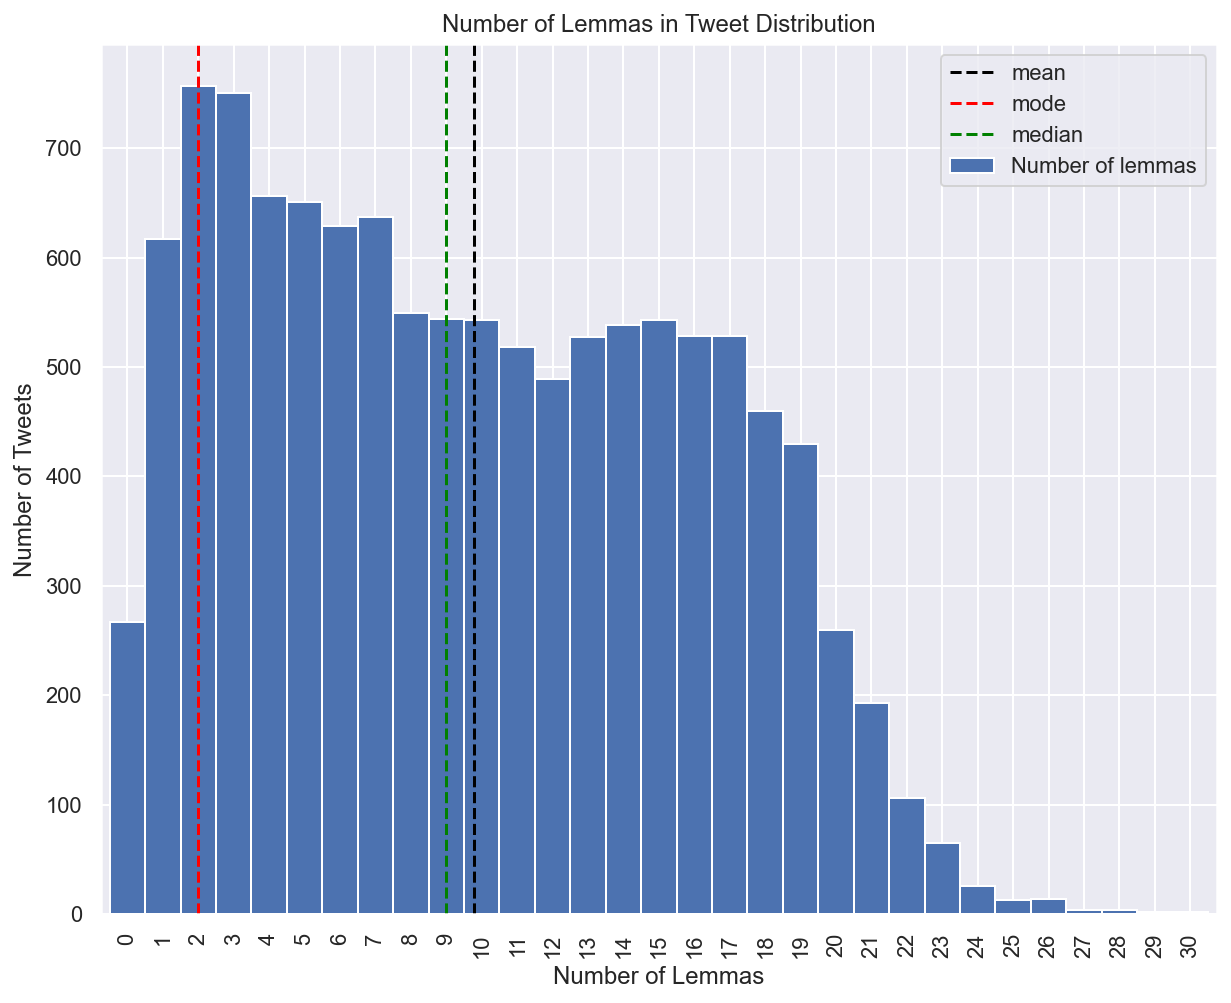

In [6]:
plt.figure()
data['n_lemmas'].value_counts().sort_index().plot(kind="bar", width=1, label='Number of lemmas')
plt.axvline(x=data['n_lemmas'].mean(),
            label='mean', color='black',
            linestyle = '--')
plt.axvline(x=data['n_lemmas'].mode()[0],
            label='mode', color='red',
            linestyle = '--')
plt.axvline(x=data['n_lemmas'].median(),
            label='median', color='green',
            linestyle = '--')
plt.legend()
plt.title('Number of Lemmas in Tweet Distribution')
plt.xlabel('Number of Lemmas')
plt.ylabel('Number of Tweets')
plt.show()

In [7]:
data = data[data['n_lemmas'] >= 3]
print(f'Number of Tweets in Dataframe after removing short tweets: {len(data)}')

Number of Tweets in Dataframe after removing short tweets: 10209


# Creating the Corpus and Dictionary of terms

In [ ]:
def from_df_to_token_dictionary (df, n_lemmas_threshold=3,):
    
    df = df[df['n_lemmas']>=n_lemmas_threshold]
    print('Number of Tweets in Dataframe after removing short tweets:', len(df))
    
    tweets_corpus = [el.split() for el in df["Lemmas"]]
    # display(tweets_corpus)
    
    token_dic = Dictionary(tweets_corpus)
    return token_dic, tweets_corpus

In [8]:
tweets_corpus = [el.split() for el in data["Lemmas"]]

In [9]:
token_dic = Dictionary(tweets_corpus)

In [10]:
word_freq = {}
for k, v in token_dic.items():
    word_freq[v] = token_dic.cfs[k]

sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_word_freq)

{'madrid': 937, 'gobierno': 922, 'el': 889, 'vox': 781, 'pp': 769, 'españa': 654, 'psoe': 559, 'gracias': 543, 'año': 523, 'libertad': 470, 'seguir': 463, 'ley': 434, 'español': 416, 'sanchez': 414, 'pais': 365, 'derecho': 361, 'persona': 349, 'violencia': 337, 'politica': 322, 'votar': 319, 'democracia': 318, 'ver': 295, 'defender': 294, 'publico': 288, 'dejar': 281, 'izquierda': 281, 'querer': 279, 'ayuso': 277, 'via': 267, 'decir': 263, 'congreso': 258, 'partido': 256, 'social': 256, 'mujer': 255, 'pasar': 255, 'apoyo': 253, 'iglesias': 253, 'frente': 246, 'millon': 246, 'odio': 239, 'politico': 235, 'cambio': 233, 'hablar': 232, 'pedir': 230, 'vida': 229, 'unidas': 227, 'familia': 225, 'yo': 220, 'presidente': 218, 'mayo': 216, 'campaña': 213, 'vacuna': 212, 'plan': 208, 'voto': 206, 'poner': 205, 'hacer': 202, 'madrileño': 198, 'futuro': 198, 'compañero': 195, 'amenaza': 194, 'derecha': 193, 'gente': 193, 'trabajador': 186, 'pablo': 183, 'impuesto': 180, 'quedar': 180, 'climatico'

# Plot and analysis of term Dictionary stuff

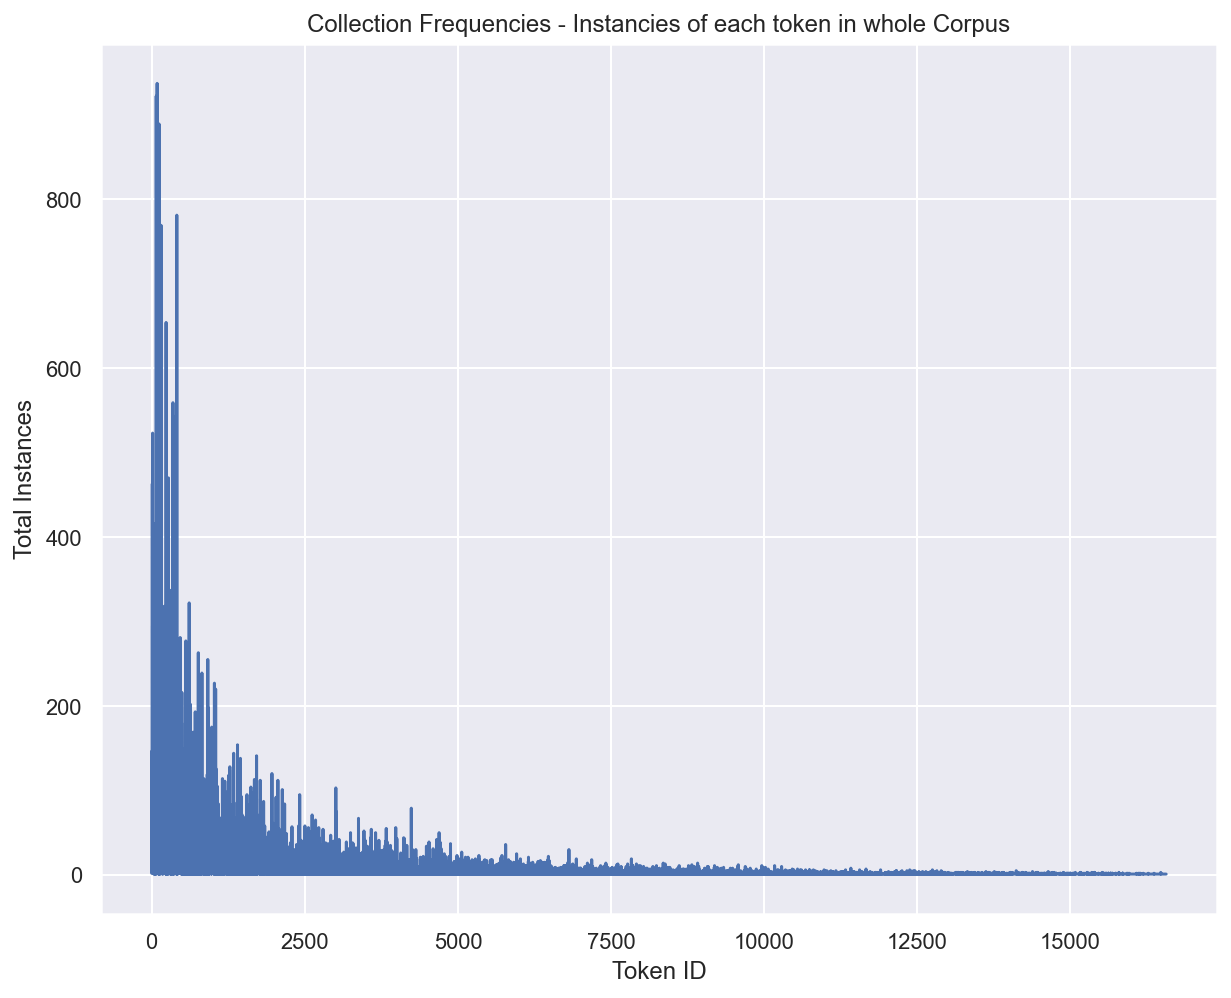

Max of occurances per topic: 937
Mean of occurances per topic: 6.8694680915293125


In [11]:
# Collection frequencies: token_id -> how many instances of this token are contained in the documents.
collfreq = sorted(token_dic.cfs.items()) 
x, y = zip(*collfreq) 
plt.plot(x, y)
plt.title('Collection Frequencies - Instancies of each token in whole Corpus')
plt.xlabel('Token ID')
plt.ylabel('Total Instances')
plt.show()

# MEAN
count = 0
_sum = 0
for key in token_dic.cfs:
    count += 1
    _sum += token_dic.cfs[key]

instances_mean = _sum/count

#MAX
instances_max = max(token_dic.cfs.values())

print(f"Max of occurances per topic: {instances_max}")
print(f"Mean of occurances per topic: {instances_mean}")

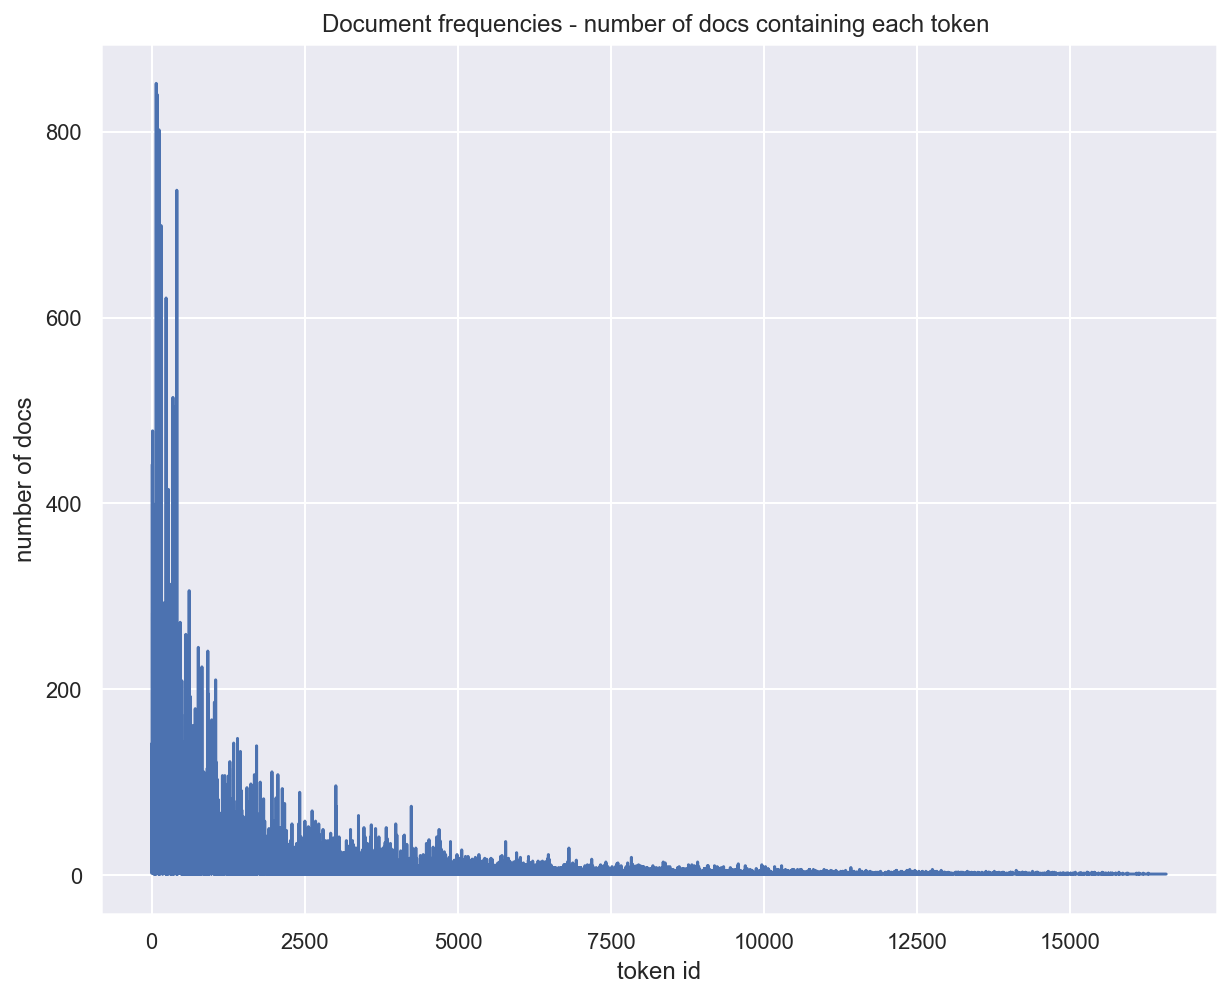

Max of docs in which a token appears: 852
Mean of docs in which token appears: 6.622532149972831


In [12]:
# Document frequencies: token_id -> how many documents contain this token
docfreq = sorted(token_dic.dfs.items()) 
j, k = zip(*docfreq) 
plt.plot(j, k)
plt.title('Document frequencies - number of docs containing each token ')
plt.xlabel('token id')
plt.ylabel('number of docs')
plt.show()

# MEAN
count = 0
_sum = 0
for key in token_dic.dfs:
    count += 1
    _sum += token_dic.dfs[key]

docs_mean = _sum/count

#MAX
docs_max = max(token_dic.dfs.values())

print(f"Max of docs in which a token appears: {docs_max}")
print(f"Mean of docs in which token appears: {docs_mean}")

# Choosing hyperparameters for filtering extremes

In [13]:
#FILTER TOKEN DICTIONARY

no_below_list = [1,2,3,4,5,6,7,8,9,10] #Minimum number of documents to keep a term in the dictionary
no_above_list = [.5, .4, .3, .2, .05, .04, .03, .02, .005, .004, .003, .002, .0005, .0004, 0.0003, .0002] #Maximum proportion of documents in which a term can appear to be kept in the dictionary

prev_dic = copy.copy(token_dic)
prev_tokens = len(token_dic)


# print('The dictionary contained', prev_tokens, 'terms')

# for i in no_below_list:
    
#     for j in no_above_list:
        
#         token_dic = Dictionary(tweets_corpus)
        
#         token_dic.filter_extremes(no_below=i,no_above=j)
        
#         n_tokens = len(token_dic)
        
#         print(n_tokens, 'terms |no_below = ', i, "| no_above = ", j)



#print('First terms in the dictionary:')
#for n in range(500):
#    print(str(n), ':', token_dic[n])#FILTER TOKEN DICTIONARY

In [14]:
filtered_token_dic = token_dic.filter_extremes(no_below=3,no_above=1)
# no filtramos con no_above porque los tweets son documentos con muy pocas palabras 

# for n in range(500):
#     print(str(n), ':', token_dic[n])#FILTER TOKEN DICTIONARY

print(f'The dictionary contains {len(filtered_token_dic)} terms')

The dictionary contains 5151 terms


# Obtaining BOW from filtered Dictionary

In [15]:
# BOW: Transform list of tokens into list of tuples (token id, token # of occurrences)

tweets_corpus_bow = [filtered_token_dic.doc2bow(doc) for doc in tweets_corpus]
# tweets_corpus_bow

# Applying LDA and Ploting it for visualization of terms in topics

In [16]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = r'C:/mallet'
mallet_path = 'C:/mallet/bin/mallet'
# mallet_path = '/Users/bernardobouzas/Downloads/mallet-2.0.8/bin/mallet'

num_topics = 10

ldamallet = LdaMallet(
    mallet_path,
    corpus=tweets_corpus_bow,
    num_topics=num_topics,
    id2word=filtered_token_dic,
    alpha=5,
    iterations=100
)

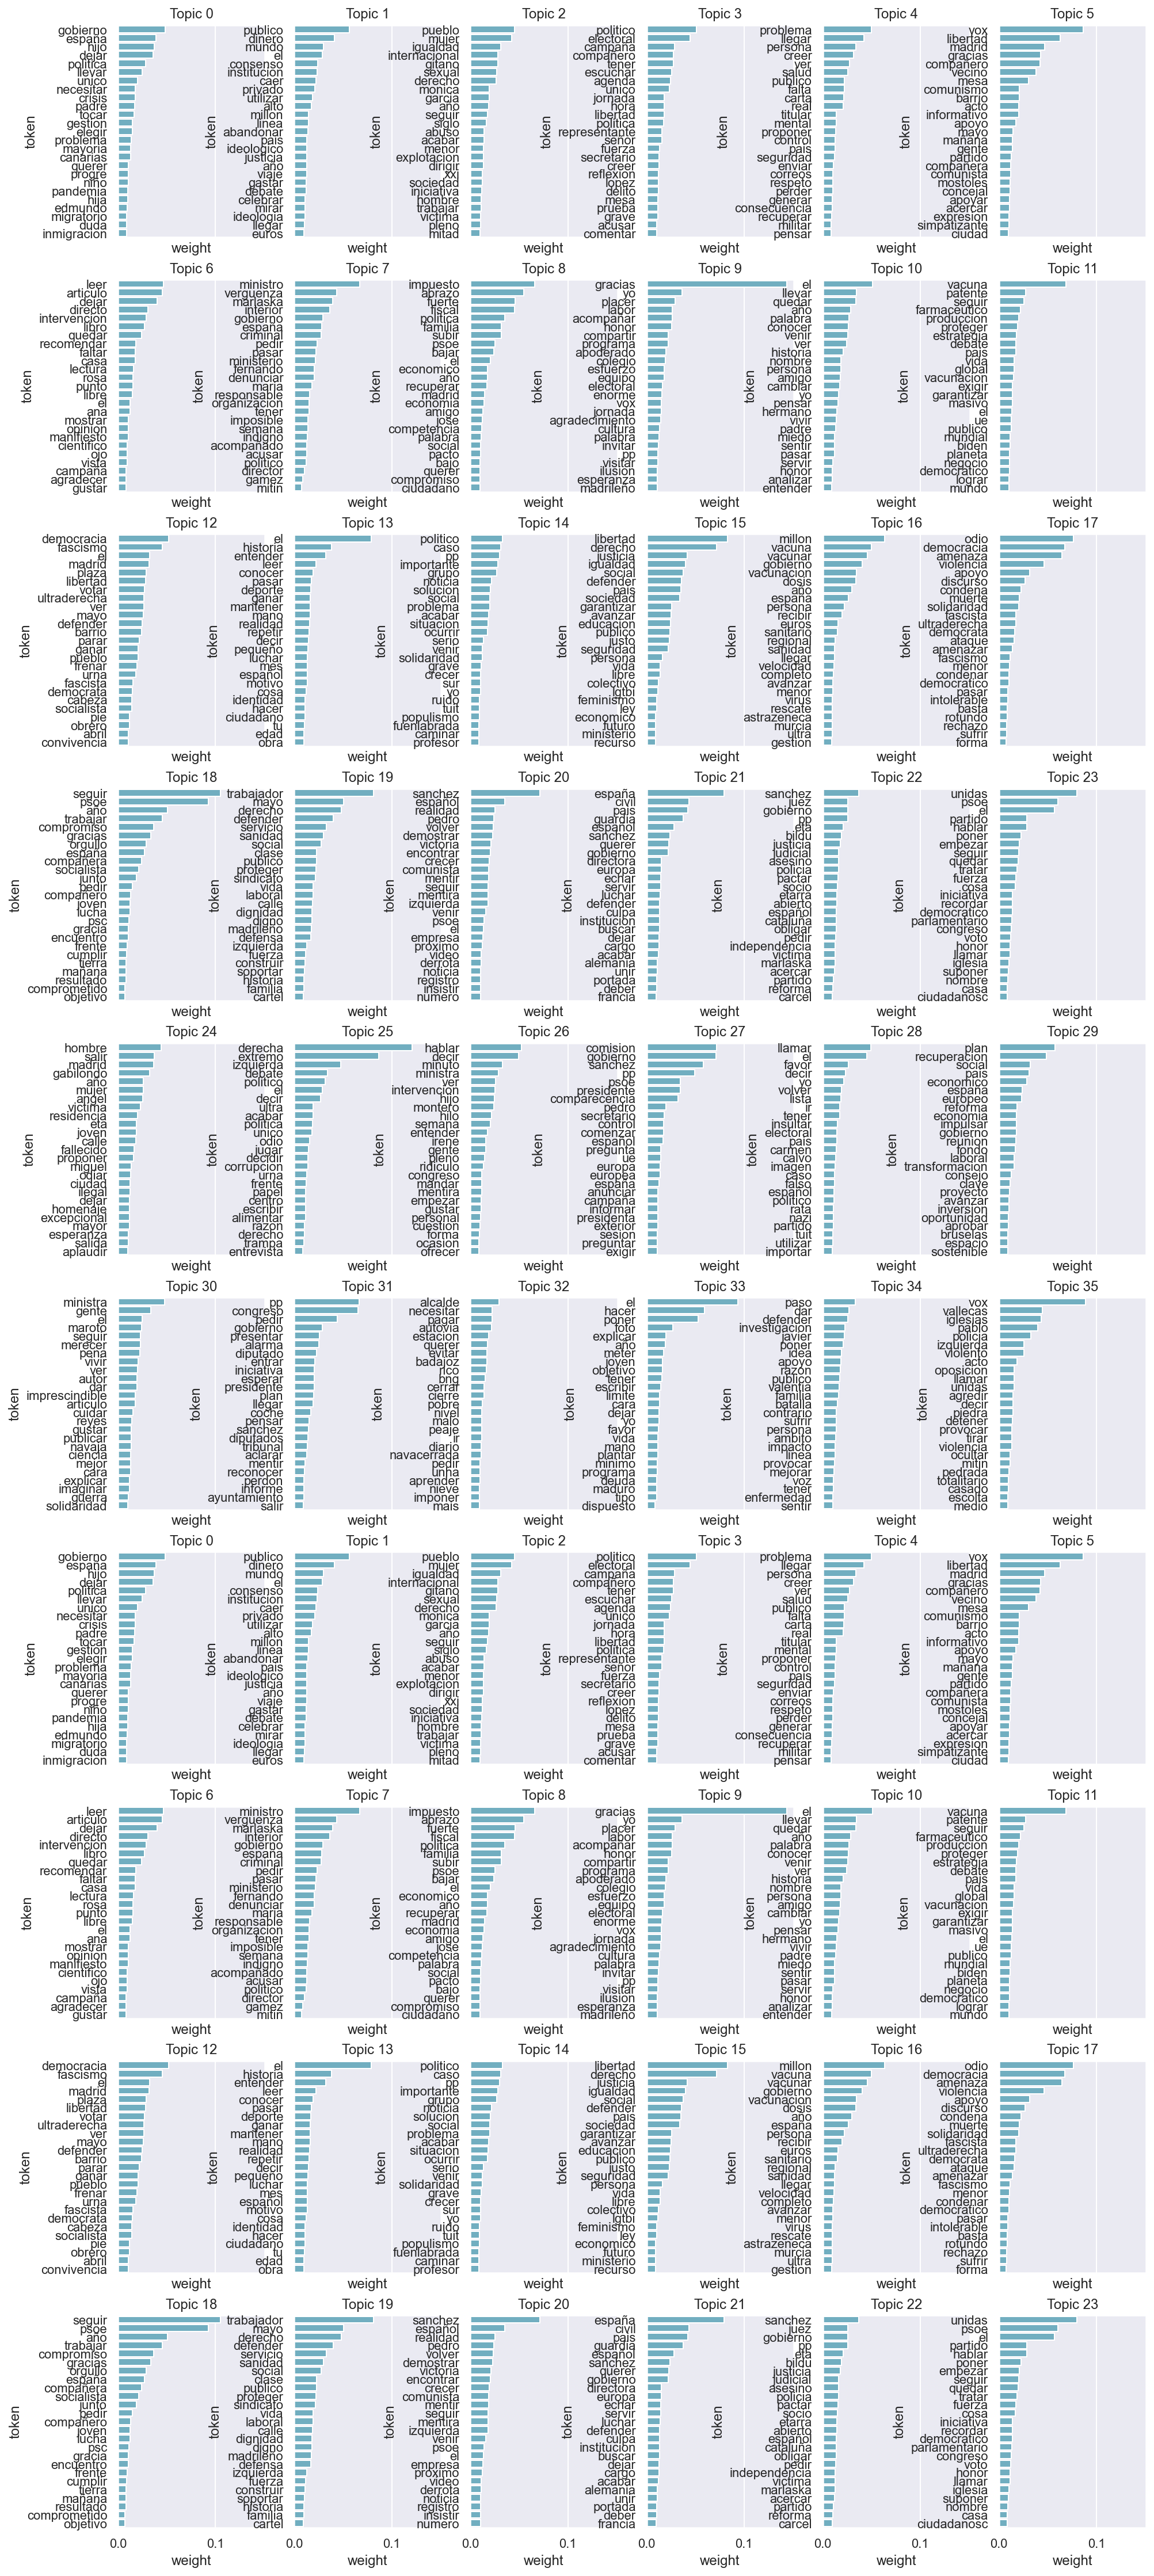

In [17]:
topn = 25
fig, axes = plt.subplots(10, 6, figsize=(16, 40), sharex=True)

for i in range(10):
    for j in range(6):
        df = pd.DataFrame(ldamallet.show_topic(j + 6*(i%6), topn=topn), columns=['token','weight'])
        sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[i][j])
        axes[i][j].set_title(f'Topic {j + 6*(i%6)}')

plt.show()

# Specific stopword removal

In [18]:
specific_stw = [
    'el', 'año', 'vivir', 'hacer', 'plan',
    'sector', 'salir', 'gestion', 'resto',
    'ir', 'yo', 'ley', 'gobierno', 'serio',
    'nacional', 'acto', 'minuto', 'explicar',
    'estar', 'poner', 'discurso', 'pedir',
    'volver', 'alto', 'punto', 'pasar', 'pais',
    'dar', 'quedar', 'hablar', 'decir', 'dejar',
    'ver', 'paso', 'importante', 'aprobar', 'gente'
]

specific_stw = [
    'dato', 'llegar', 'politica', 'venir', 'leer',
    'seguir', 'entender', 'tener', 'llevar', 'convertir',
    'directo', 'partido', 'cara', 'caso', 'hilo', 'gracia',
    'favor', 'medio', 'forma', 'senor', 'empezar'
]

specific_stw = list(set([el.lower() for el in specific_stw]))

In [19]:
def remove_stpwrd(string, specific_stw_eliminate):
    splitted = string.split()
    resultwords  = [word for word in splitted if word.lower() not in specific_stw_eliminate]
    result = ' '.join(resultwords)
    return result

In [20]:
data['Lemmas'] = data['Lemmas'].apply(lambda x: remove_stpwrd(str(x), specific_stw))

data['n_lemmas'] =  data['Lemmas'].str.split().str.len()
#print('Number of projects in DataFrame after applying specific stopwords and removing short texts:', len(NSF_df))

c:\users\manun\documents\mis proyectos\nlp-with-spanish-politicians-tweets\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\manun\documents\mis proyectos\nlp-with-spanish-politicians-tweets\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Again, create corpus, dictionary and filter the dictionary

In [21]:
tweets_corpus = [el.split() for el in data["Lemmas"]]
token_dic = Dictionary(tweets_corpus)
filtered_token_dic.filter_extremes(no_below=3, no_above=1)
tweets_corpus_bow = [filtered_token_dic.doc2bow(doc) for doc in tweets_corpus]

In [22]:
from gensim.models.wrappers import LdaMallet
import os
from gensim.models import LdaModel
#from gensim.models import CoherenceModel
from gensim.models.coherencemodel import CoherenceModel


# Choosing hyperparameter number of topics

In [23]:
list(range(60,3,-10))

[60, 50, 40, 30, 20, 10]

In [24]:
tc = []
n_topics = range(150,3,-15)

for i, ntpc in enumerate(n_topics):
      lda_ntcp = LdaModel(corpus = tweets_corpus_bow, 
                          id2word = token_dic, 
                          num_topics = ntpc)
      
      tc.append(CoherenceModel(lda_ntcp,
                               texts = tweets_corpus,
                               dictionary = token_dic,
                               coherence = 'c_v').get_coherence())
      print(f'Tested {i+1} models out of {len(n_topics)}')

Tested 1 models out of 10
Tested 2 models out of 10
Tested 3 models out of 10
Tested 4 models out of 10
Tested 5 models out of 10
Tested 6 models out of 10
Tested 7 models out of 10
Tested 8 models out of 10
Tested 9 models out of 10
Tested 10 models out of 10


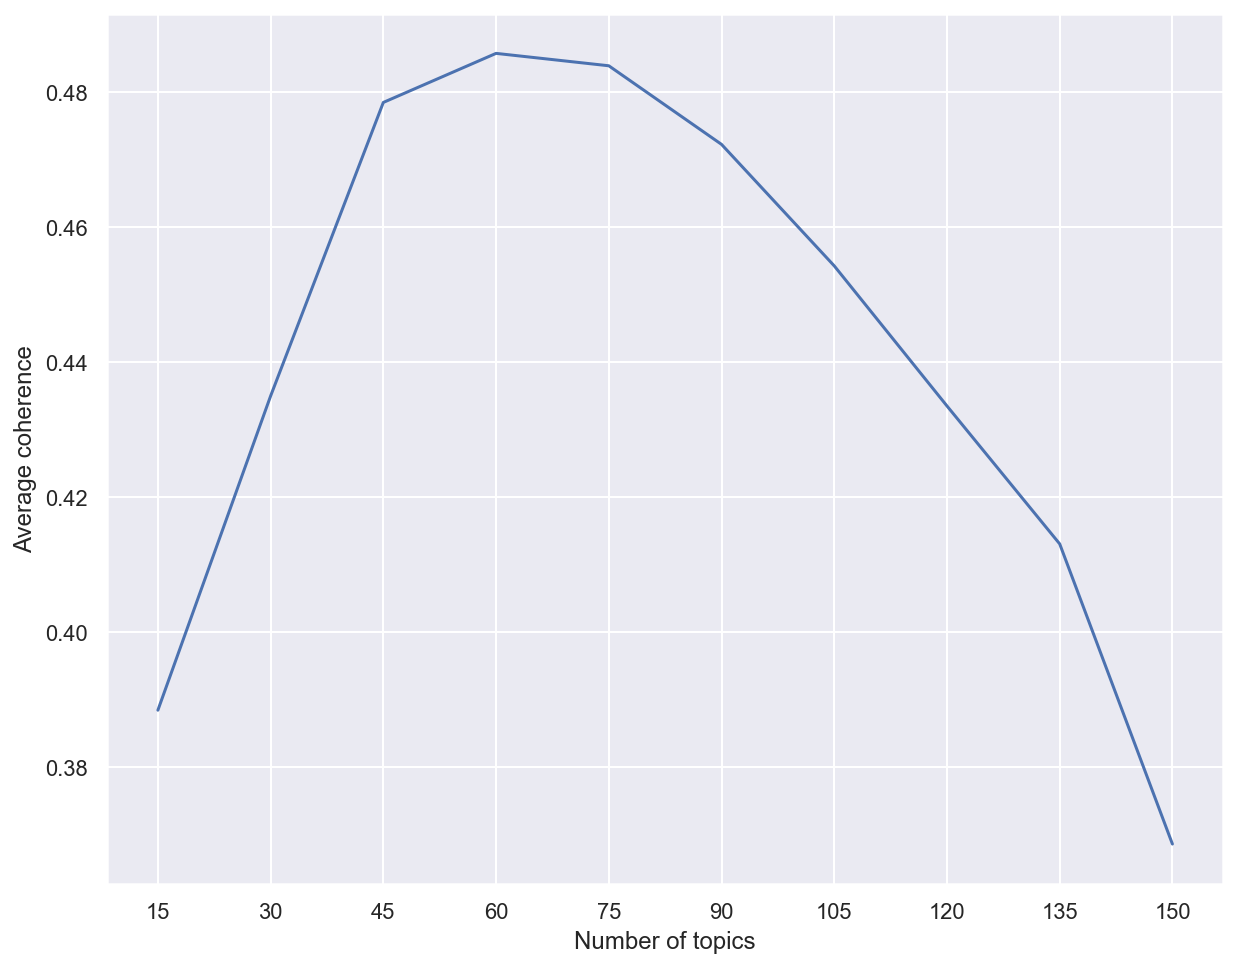

In [25]:
plt.figure()
plt.plot(n_topics, tc)
plt.xticks(n_topics,n_topics)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')
plt.show()

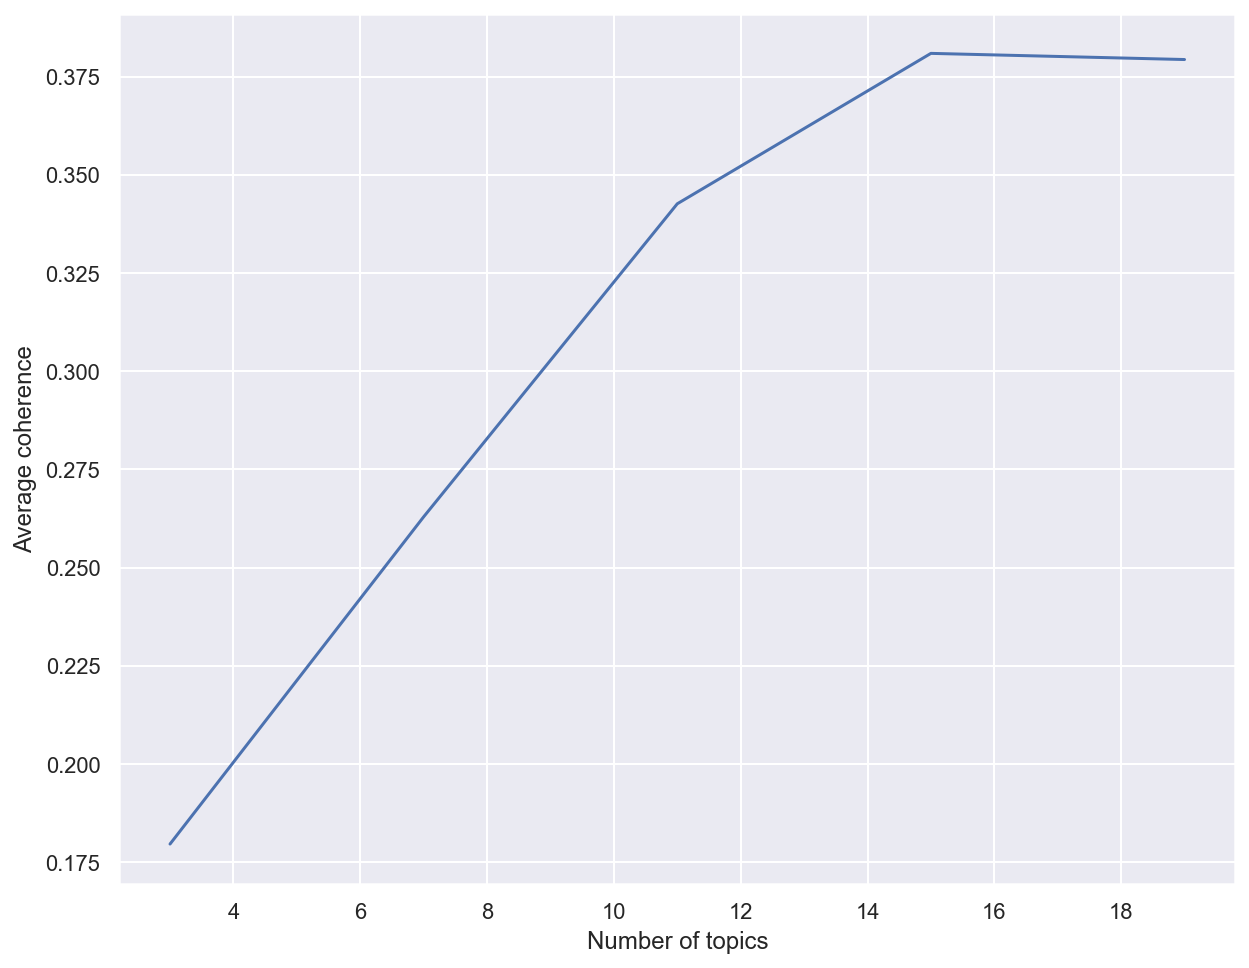

In [26]:
#fine tune
n_topics = range(3,20,4)
tc = []

for ntpc in n_topics:
      lda_ntcp = LdaModel(corpus = tweets_corpus_bow, 
                          id2word = token_dic, 
                          num_topics = ntpc)
      
      tc.append(CoherenceModel(lda_ntcp,
                               texts = tweets_corpus,
                               dictionary = token_dic,
                               coherence = 'c_v').get_coherence())

plt.figure()
plt.plot(n_topics, tc)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')
plt.show()

In [27]:
# print(list(ldamallet.load_document_topics()))
# print(len(list(ldamallet.load_document_topics())))

"""
rec = []
for topic in ldamallet.load_document_topics():
    rec.append([value[1] for value in topic])
       
df = pd.DataFrame(rec)

print(len(df), len(data))


df['Likes'] = data.sort_index()["Likes"].to_list()
df['Retweets'] = data.sort_index()["Retweets"].to_list()
df["Party"] = data.sort_index()["Party"].to_list()
df
"""

'\nrec = []\nfor topic in ldamallet.load_document_topics():\n    rec.append([value[1] for value in topic])\n       \ndf = pd.DataFrame(rec)\n\nprint(len(df), len(data))\n\n\ndf[\'Likes\'] = data.sort_index()["Likes"].to_list()\ndf[\'Retweets\'] = data.sort_index()["Retweets"].to_list()\ndf["Party"] = data.sort_index()["Party"].to_list()\ndf\n'